# Task 3: To explore Unsupervised Machine Learning

__1) To import necessary libraries__

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

__2) Importing data__


In [2]:
df=pd.read_csv("Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


__3) Understanding the data__

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [14]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [123]:
df.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


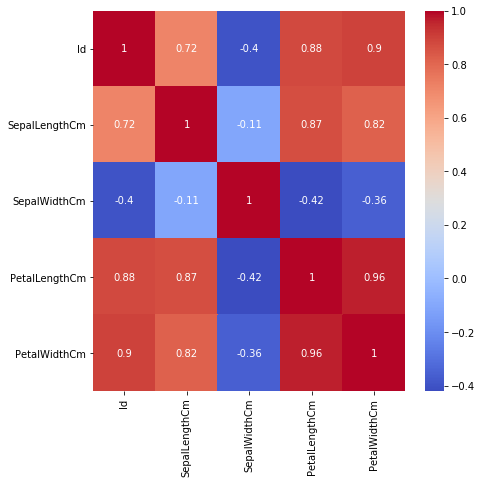

In [125]:
plt.figure(figsize=(7,7))
sns.heatmap(df.corr(),annot=True,cmap="coolwarm")

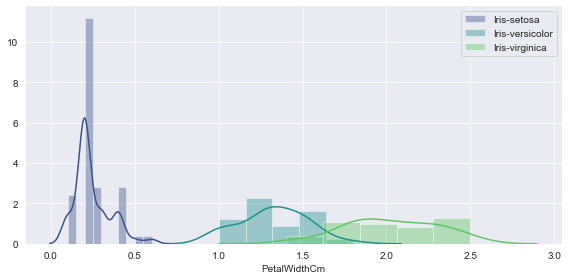

In [157]:
sns.set_style('darkgrid')
g = sns.FacetGrid(df,hue="Species",palette='viridis',height=4,aspect=2)
g.map(sns.distplot,"PetalWidthCm")
plt.legend()

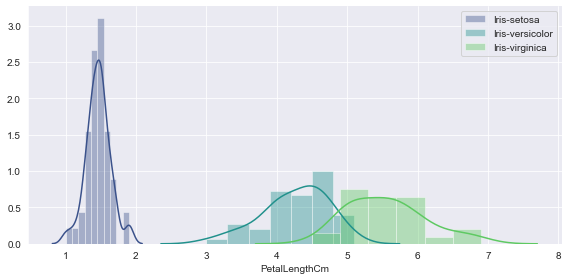

In [147]:
sns.set_style('darkgrid')
g = sns.FacetGrid(df,hue="Species",palette='viridis',height=4,aspect=2)
g.map(sns.distplot,"PetalLengthCm")
plt.legend()

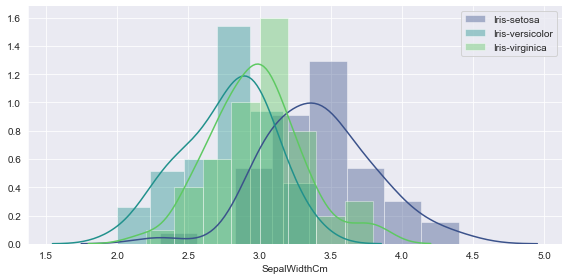

In [151]:
sns.set_style('darkgrid')
g = sns.FacetGrid(df,hue="Species",palette='viridis',height=4,aspect=2)
g.map(sns.distplot,"SepalWidthCm")
plt.legend()

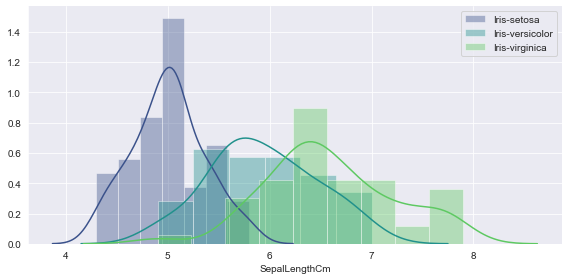

In [155]:
sns.set_style('darkgrid')
g = sns.FacetGrid(df,hue="Species",palette='viridis',height=4,aspect=2)
g.map(sns.distplot,"SepalLengthCm")
plt.legend()

__4) Finding the optimal number of clusters by K-Means Clustering algorithm__

In [116]:
x = df[["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"]].values

Here, we will use Elbow method to find the optimal number of clusters.

In [117]:
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

Here, "wcss" stands for within cluster sum of squares which means the sum of the squared deviations from each observation and the cluster centroid.

Text(0, 0.5, 'WCSS')

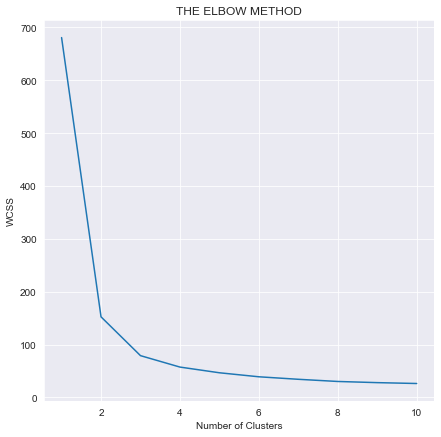

In [158]:
sns.set_style("darkgrid")
plt.figure(figsize=(7,7))
plt.plot(range(1,11),wcss)
plt.title("THE ELBOW METHOD")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")   

As we can see that from cluster "3", the graph becomes a litle bit linear(or we can say that the WCSS doesn't decrease significantly with every iteration), therefore we take the number of clusters to be "3".

__5) Training the K-Means model__

In [120]:
kmeans=KMeans(3)
y_kmeans=kmeans.fit_predict(x)

In [121]:
y_kmeans

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

__6) Visualizing the Clusters__

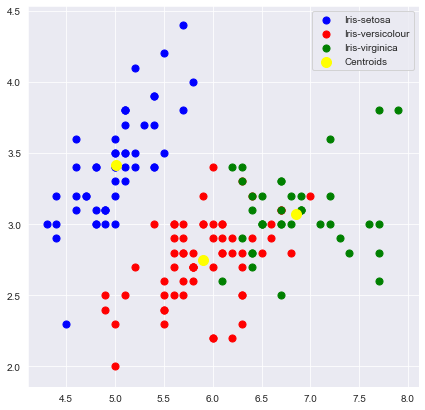

In [162]:
#visualizing the clusters on the first two columns with centroids
sns.set_style("darkgrid")
plt.figure(figsize=(7,7))
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1],s=50, c = 'blue', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1],s=50, c = 'red', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],s=50, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1],s = 100, c = 'yellow', label = 'Centroids')

plt.legend()